In [1]:
import pandas as pd
import numpy as np
path='/content/Womens Clothing E-Commerce Reviews.csv'
df=pd.read_csv(path)


In [2]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [3]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful - silky and sexy and comf...       4   
1           1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [5]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [6]:
len(df)

23486

In [7]:
df.describe()

Unnamed: 0           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean   11742.500000     43.198544      4.196032         0.822362   
std     6779.968547     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%     5871.250000     34.000000      4.000000         1.000000   
50%    11742.500000     41.000000      5.000000         1.000000   
75%    17613.750000     52.000000      5.000000         1.000000   
max    23485.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000

In [8]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [9]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [10]:
df['Recommended IND'].unique()

array([1, 0])

In [11]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [12]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Sentiment Analysis

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
df.dtypes

Unnamed: 0                  int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [16]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [17]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [18]:
df = df[~df['Review Text'].isnull()]

In [19]:
df['length']=df['Review Text'].apply(len)

In [20]:
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful - silky and sexy and comf...       4   
1           1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  
0  Intimates      53  
1    Dresses     303  
2    Dresses     500  
3      Pants     124  
4    Blouses     192

Length after removing the rows where Review Text is null

In [21]:
len(df)

22641

Text(0.5, 1.0, 'message length')

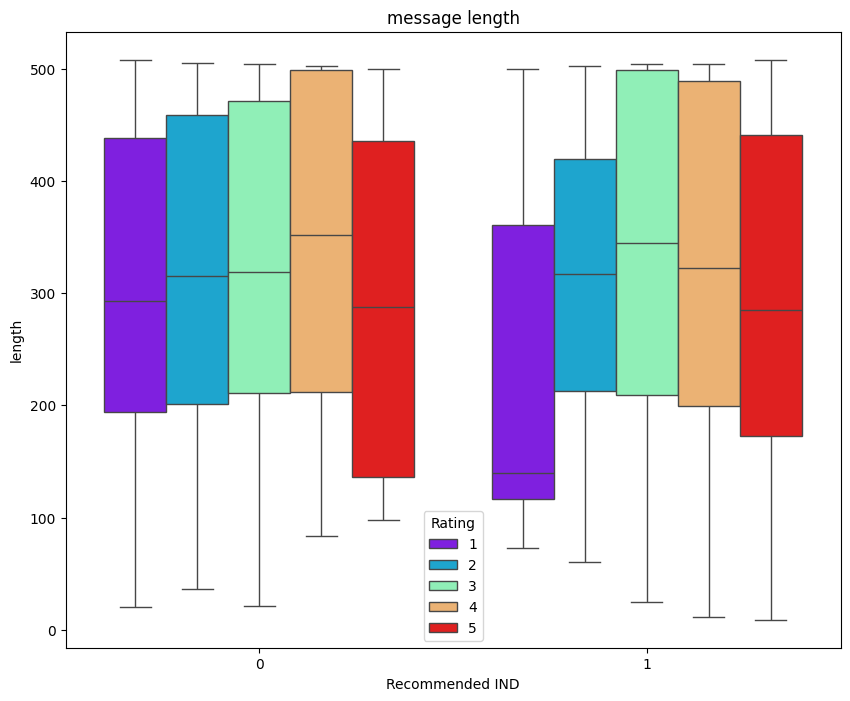

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [23]:
df.length.describe()


count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

maximum length is 508.

In [24]:
df[df['length'] == 508]['Review Text'].iloc[0]


'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

**Removing puntuations**

In [25]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful  silky and sexy and comfo...       4   
1           1   34  Love this dress  its sooo pretty  i happened t...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love love love this jumpsuit its fun flirty ...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  
0  Intimates      53  
1    Dresses     303  
2    Dresses     500  
3      Pants     124  
4    Blouses     192

**Text blob for polarity**

In [26]:
from textblob import TextBlob
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful  silky and sexy and comfo...       4   
1           1   34  Love this dress  its sooo pretty  i happened t...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love love love this jumpsuit its fun flirty ...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  
0  Intimates      53  
1    Dresses     303  
2    Dresses     500  
3      Pants     124  
4    Blouses     192

In [27]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [28]:
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful  silky and sexy and comfo...       4   
1           1   34  Love this dress  its sooo pretty  i happened t...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love love love this jumpsuit its fun flirty ...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  Polarity  
0  Intimates      53  0.633333  
1    Dresses     303  0.318750  
2    Dresses     500  0.076392  
3      Pants     124  0.500000  
4    Blouses     192  0.393750

In [29]:
df['Polarity'].min()

-0.9750000000000001

In [30]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [31]:
df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)


In [32]:
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful  silky and sexy and comfo...       4   
1           1   34  Love this dress  its sooo pretty  i happened t...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love love love this jumpsuit its fun flirty ...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  Polarity TextBlob_Analysis  
0  Intimates      53  0.633333          Positive  
1    Dresses     303  0.318750          Positive  
2    Dresses     500  0.076392          Positive  
3      Pants     124  0.500000          Positive  
4    Blouses     192  0.393750          Positive

In [33]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [34]:
polarity_plot

TextBlob_Analysis
Positive    21213
Negative     1333
Neutral        95
Name: count, dtype: int64

In [35]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

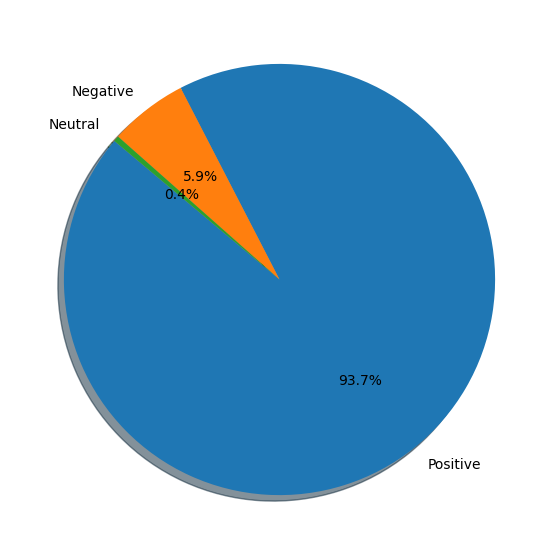

In [36]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

***Label Encoding***

In [37]:
 #Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])

df['Encoded_value'].unique()

array([2, 0, 1])

In [38]:
df.head()

Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33  Absolutely wonderful  silky and sexy and comfo...       4   
1           1   34  Love this dress  its sooo pretty  i happened t...       5   
2           2   60  I had such high hopes for this dress and reall...       3   
3           3   50  I love love love this jumpsuit its fun flirty ...       5   
4           4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  length  Polarity TextBlob_Analysis  Encoded_value  
0  Intimates      53  0.633333          Positive              2  
1    Dresses     303  0.318750          Positive              2  
2    Dresses     500  0.076392          Positive              2  
3      Pants     124  0.500000          Positive              2  
4    Blouses     192  0.393750          Positive              2

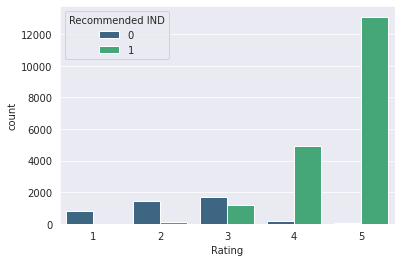

In [ ]:
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')

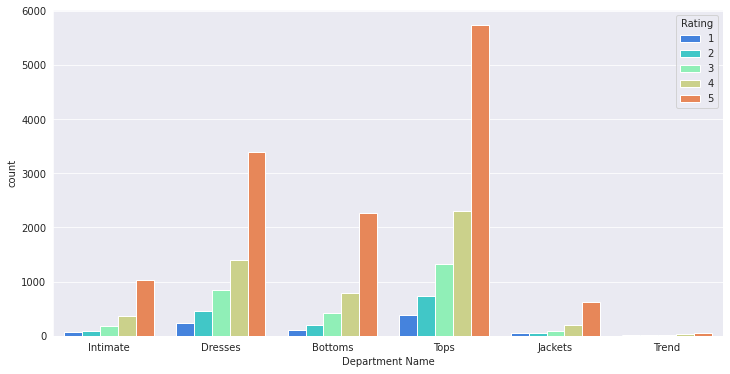

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

word  frequency
0       true size       1283
1    usually wear        683
2     looks great        605
3      love dress        604
4   fit perfectly        598
5       well made        501
6      size small        478
7      usual size        475
8  fits perfectly        475
9       look like        408

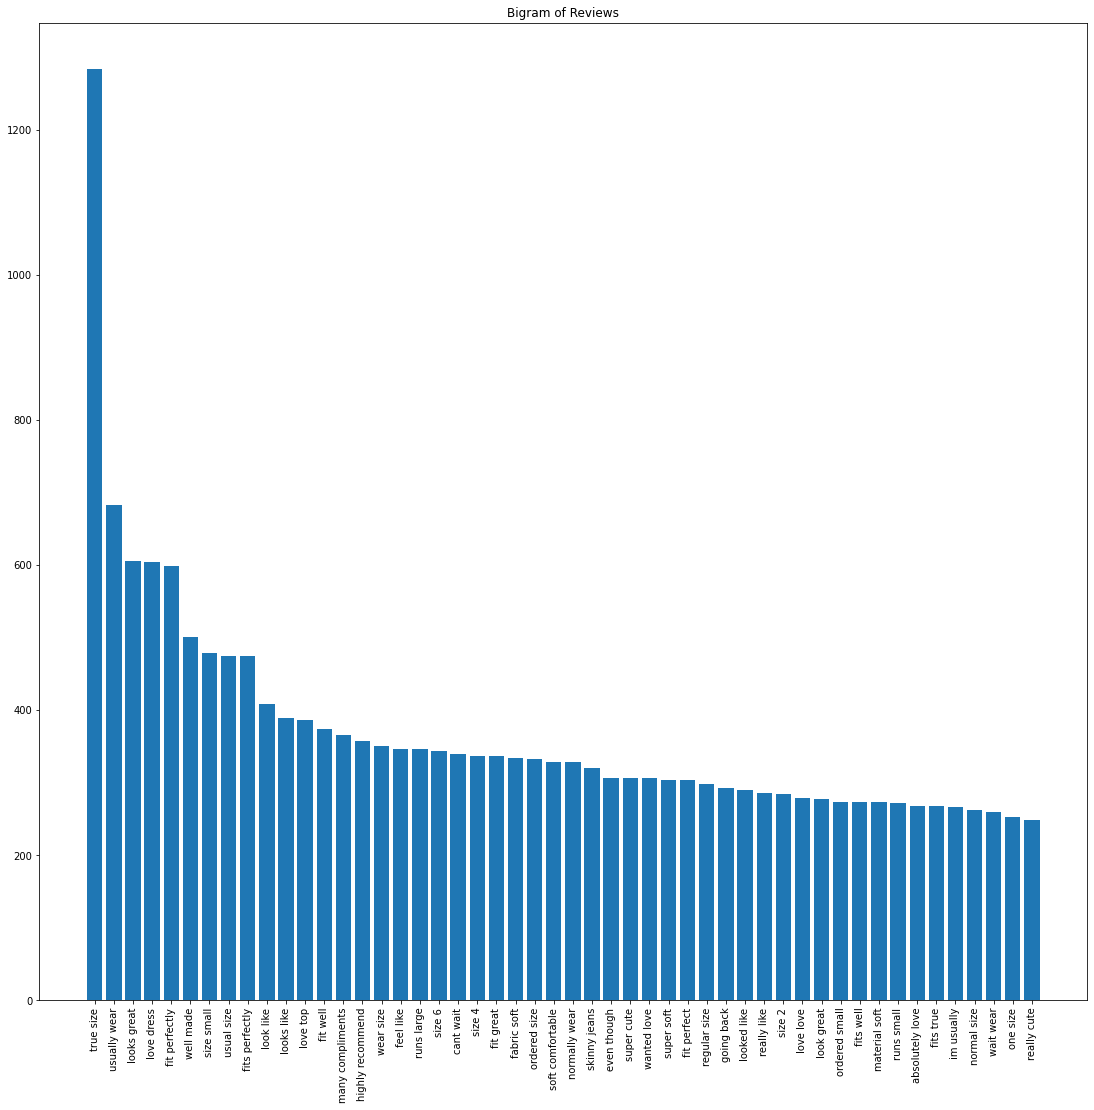

In [ ]:
Ngram(df["Review_text_cleaned"],2,title="Bigram of Reviews")

word  frequency
0       true size       1257
1    usually wear        618
2     looks great        602
3   fit perfectly        596
4      love dress        591
5       well made        477
6  fits perfectly        471
7      usual size        443
8      size small        428
9        love top        384

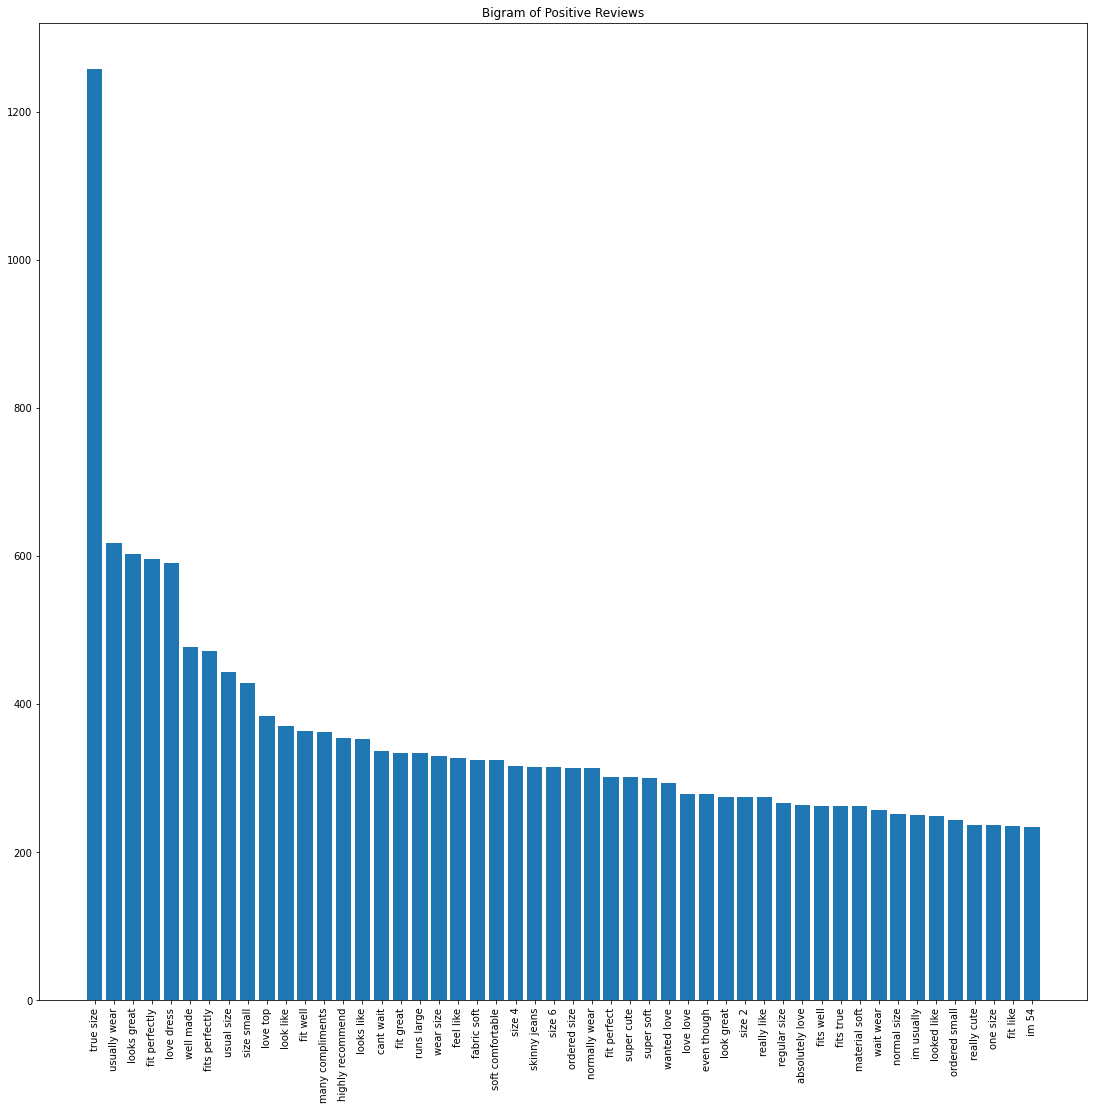

In [ ]:
Ngram(df_positive["Review_text_cleaned"],2,title="Bigram of Positive Reviews")

# ***NLP Classification Task***

# Bag Of Words

In [41]:
df['TextBlob_Analysis']=df['TextBlob_Analysis'].astype(str)

In [42]:
df['Polarity'].dtypes

dtype('float64')

In [43]:
df['Polarity'] = df['Polarity'].astype(str)

In [44]:
df['Review Text'] = df['Review Text'].astype(str)

**Cleaning the texts in 'Review Text' column and creating a corpus.**

In [45]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from tqdm import tqdm
df.index = np.arange(len(df))
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
print(corpus)

['absolut wonder silki sexi comfort', 'love dress sooo pretti happen find store im glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit', 'high hope dress realli want work initi order petit small usual size found outrag small small fact could not zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c', 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment', 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt', 'love traci rees dress one not petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame not stranger alter shorten narrow skirt would take away embellish garment love color idea style not work return dress', 'ade basket hte last mintu see would look like person store pick w

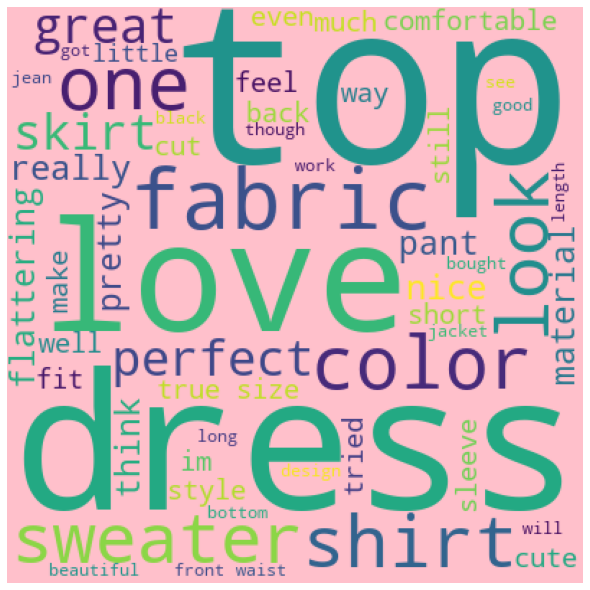

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_positive["Review Text"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='pink',max_words=100,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#vectorization


**In order to fit the corpus in count vectorizer, we need to change into the corpus to array**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [48]:
print(y)

[2 2 2 ... 2 2 2]


**Splitting the dataset into the Training set and Test set**


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Training a Model**

**Using Multinomial Naive Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fitting the train and text data in the Multinomial MB**

In [51]:
nb.fit(X_train,y_train)

MultinomialNB()

**Predictions and Evaluations**

In [52]:
predictions = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test**



In [53]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
acc = accuracy_score(y_test,predictions)

In [54]:
print("Accuracy of the classifier: ",acc)
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,predictions))
print("Classification report: \n" ,metrics.classification_report(y_test,predictions))

Accuracy of the classifier:  0.9291234268050342
Confusion matrix is :
 [[  27    0  267]
 [   0    0   21]
 [  33    0 4181]]
Classification report: 
               precision    recall  f1-score   support

           0       0.45      0.09      0.15       294
           1       0.00      0.00      0.00        21
           2       0.94      0.99      0.96      4214

    accuracy                           0.93      4529
   macro avg       0.46      0.36      0.37      4529
weighted avg       0.90      0.93      0.91      4529



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The accuracy with Multinomial NB is 0.93**

#**Using Text Processing**

***Tfidf term frequency inverse document frequency***

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#**Using the Pipeline**

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # import TfidfTransformer and CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [58]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [59]:
X = df['Review Text']
y = df['Encoded_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [60]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

**Predictions and Evaluation**

In [61]:
predictions = pipeline.predict(X_test)

In [62]:
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,predictions))
print("Classification report: \n" ,metrics.classification_report(y_test,predictions))

Confusion matrix is :
 [[   0    0  389]
 [   0    0   29]
 [   0    0 6375]]
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.00      0.00      0.00        29
           2       0.94      1.00      0.97      6375

    accuracy                           0.94      6793
   macro avg       0.31      0.33      0.32      6793
weighted avg       0.88      0.94      0.91      6793



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The accuracy using pipeline method is 0.94**

In [75]:
# Define a function to classify contradictory reviews
def classify_contradictory_review(row):
    # Assuming the review text is in a 'Review Text' column and the rating in a 'Rating' column
    try:
        # Attempt to convert 'Rating' and 'Polarity' to float
        rating = float(row['Rating'])
        polarity = float(row['Polarity'])

        if row['TextBlob_Analysis'] == 'positive' and rating < 3 or polarity < 0.2:
            return 'Contradictory'
        elif row['TextBlob_Analysis'] == 'negative' and rating > 3:
            return 'Contradictory'
        else:
            return 'Non-contradictory'
    except ValueError:
        # Handle cases where conversion to float fails
        print(f"Error converting values for row: {row}")  # Print error for debugging
        return 'Error'  # You might want to handle this differently depending on your needs

# Applying the function to the dataframe
df['Contradictory'] = df.apply(classify_contradictory_review, axis=1)

# Display the updated dataframe with the new column for contradictory reviews
df[['Review Text', 'Rating', 'TextBlob_Analysis', 'Contradictory']].head()
output_path = '/content/Contradictory_Reviews.xlsx'
df.to_excel(output_path, index=False)

print(f"File saved to {output_path}")

File saved to /content/Contradictory_Reviews.xlsx
